<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="220"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="250"/>  

# <center>Programming for Data Analysis 2019 Project: Simulating Real World Data</center>  #

***
**Module Name**: Programming for Data Analysis  
**Module Number**: 52465  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
***

**Problem statement**  
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.  

We suggest you use the numpy.random package for this purpose.  

Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.  
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.  

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 

***

# Table of Contents #
1. [Introduction](#intro)  
1.1 [Helper Functions](#help)
2. [Dataset](#dataset)  
2.1 [Cell Line](#cell_line)  
2.2 [Bioreactor Size](#brSize)  
2.3 [Average Temperature](#temp)  
2.4 [Dissolved Oxygen](#do)  
2.5 [Culture type](#culture)  
2.6 [Peak Viable Cell Density](#cell_dens)  
2.7 [Processing Time](#hours)  
2.8 [No of alarms](#alarms)  
2.9 [Yield](#yield)  
2.10 [Net worth of batch](#worth)
3. [Finishing Off the Dataset](#finish)
4. [Describe New Dataset](#describe)
5. [Conclusion](#conclusion)
6. [References](#refs)

 ## <a name="intro"></a>1. Introduction ## 
For my data simulation project I have chosen the production of biopharmaceuticals products. Biopharmaceutical production is achieved by manipulating living cells to produce a medicinal product. The cells themselves may be microbial e.g. bacteria, fungal or yeast cells, or mammalian e.g. Chinese Hamster Ovary cells, insect or plant cells. In general the more complex the cell, the more complex the product that cell can produce. 

<img align="right" src="images/bioreactor.png" alt="bioreactor" width="475"/> A very common type of biopharmaceutical is the monoclonal antibody (mAb). Naturally occurring antibodies are produced in the body as part of our immunological defense systems. Whenever we get a cough or cold, or indeed anything more serious, our bodies will produce antibodies to target whatever is causing the illness. This may be a bacterium, _e.g._ Strep throat caused by _Streptococcus pyogenes,_ a virus, in the case of a cold or flu, some foreign matter _e.g._ pollen which will result in hayfever or even the bodies own cells when they become aged or damaged. Because antibodies may be made to combat any substance that enters the body, they make ideal candidates to harness for therapeutic purposes.  

Monoclonal antibodies have been produced to treat a huge amount of diseases _e.g._ as chemotherapeutics and to alleviate the symptoms of many autoimmune diseases such as arthritis, Crohns disease _etc_. In general, the monoclonal antibodies are very high net worth drugs and quite complex in size, nature and in their manufacture. As a result only the more complex cells can make them _i.e._ mammalian cells. 

Microbial cells are more suited to the culturing process and have been long used to produce the like of antibiotics like penicillin. Microbial cells are not capable of producing the complex mAb, but have been used to produce mAb fragments which are also used for therapeutic purposes.

To make a biopharmaceutical a single cell that is good at producing the product required, _e.g._ the mAb, is cloned repeatedly. This cloned cell is grown in a vessel called a bioreactor (pictured on the right [[7]](#7)). The cells are grown and conditions maintained to encouraged them to produce the biopharmaceutical. The contents of the bioreactor are then removed, the medicinal product _e.g._ antibody, is extracted and purified to produce the final biopharmaceutical product.  

For the purposes of the dataset simulation, I am looking at the growth and production of the biopharmaceutical only. I am ignoring the downstream harvesting, protein capture and polishing steps. The data I have initially chosen to simulate for this project are:  
<img align="right" src="images/biopharmaceutical.jpg" alt="bioreactor" width="350"/> 
* Cell line
* Bioreactor Size  
* Average Temperature   
* Dissolved Oxygen  
* Peak Viable Cell Density  
* Processing Hours  
* Culture type  
* No of alarms  
* Yield  
* Net worth of batch  

I will use the numpy random package as an aid to the data simulation [[1](#1)].

### <a name="help"></a>1.1 Helper Functions  

There are a number of repetitive checks / transformations need to be done to the data being generated. This section houses any functions we need to perform these tasks. Many of these are due to the fact that the data being generated is random, so without using the seed function, we cannot predict exactly where the data will fall.  

These functions include:
* setLimits - to ensure that hard minimum or maximum values are held irrespective of data generated  

Before we do anything however, we need first import the packages required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting and as a basis for seaborn
from scipy import stats # Caluclation of z-scores
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 6] # Setting the plot size

In [2]:
# This function resets the minimum and maximum values
# If there are hard set limits eg size of bioreactor cannot be negative, DO level cannot be above 6.7 etc
# This does over-ride the normal or whatever distribution chosen, 
# but it gets rid of nonsense values and it is a simulation ...
def setLimits(attList, minReq, maxReq, minVal, maxVal):
    # Create a new list to return the corrected values
    newList = []
    # Loop through each item in the list
    for att in attList:
        # If we are checking for minimum values
        # And the item is below the min value
        if minReq and att < minVal:
            # Reset to be minVal
            att = minVal
        # If we are checking for maximum values
        # And the item is above the max value    
        if maxReq and att > maxVal:
            # Reset to be the maxVal
            att = maxVal
        # Create a new list with corrected values
        newList.append(att)
    # Return the new list
    return newList

## 2. <a name="dataset"></a>The Dataset

Of all the parameters I have chosen, the most influential of all is the cell type. There are three possible cell types and as almost every variable is dependent on the kind of cells used, the plan is to create three minidatasets which I will combine at the end. Each of these dataset will be 100 rows long.  

### <a name="cell_line"></a>2.1 Cell Line 
This is the type of used to produce the antibody. While there are many types of cells utilised in biopharmaceutical production, for the purposes of this project I am ploying categorical data. The cell type may be -

<img align="right" src="images/CHO.png" alt="Chinese Hamster Ovary Cells" width="380"/> 
* Microbial cells (_e.g. E. coli._) - being unicellular, these cells are the easiest to grow, will produce a lot of product, but can only produce basic proteins.  
* Mammalian cell (_e.g._ CHO) - Chinese Hamster Ovary cells (pictured on right [[8]](#8)) are frequently used in biopharmaceutical processing. They can produce complicated proteins but are harder to grow in vitro. Mammalian cells are used to being part of a larger organism that has specialised organs to look after for example waste disposal _etc._. They also rely on other organs for physical protection and anchorage _e.g._ bones and skin. Mammalian cells do not adapt well to being on their own in a bioreactor and as a result will grow much slower and be more susceptible to damage than microbial cells.  
* Humanised CHOs - As the body recognises CHO-produced proteins as non-human, they elicit an immune response. CHOs may be genetically manipulated to produce humanised proteins which are better accepted by the body. This genetic manipulation further destabilises the cells however, making them more difficult again to grow.  

This is a really important feature as many of the following attributes depend on the cell type. In general, the microbial cell line is more robust, mammalian (CHO) less so, and to a lesser extent the mammalian producing humanised protein even less so. For now, I will evenly split the sample size into three and assume there are equal number of each.

In [3]:
data = ["Microbial"]*100
dfMicro = pd.DataFrame(data, columns = ['cell_line']) 
data = ["CHO"]*100
dfMam = pd.DataFrame(data, columns = ['cell_line']) 
data = ["vCHO"]*100
dfHum = pd.DataFrame(data, columns = ['cell_line']) 

# Create set of all three datasets
datasets = [dfMicro, dfMam, dfHum]
dsNames = ["Microbial", "Mammalian", "Humanised"]

### <a name= brSize></a>2.2 Size of bioreactor
THe size of the bioreactor The larger the bioreactor, the greater the amount of product produced. It takes more time for the cells to acclimatise to the bioreactor, particularly the mammalian cells (CHO and humanised CHO). For the purposes of the data simulation it is assumed there will be a uniform distribution of the bioreator sizes.


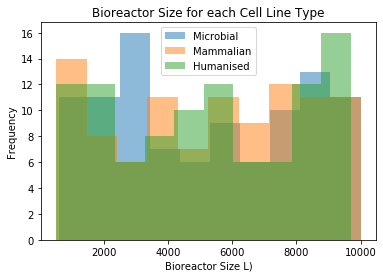

In [4]:
# Start with Bioreactor Size
for dataset in datasets:
    # This will be a uniformly distributed range of sizes from 500L to 10000L 
    brSize = 100 * np.random.randint(5, 101, 100)
    dataset["br_size"] = brSize
    plt.hist(brSize, alpha = 0.5)

plt.xlabel("Bioreactor Size L)")
plt.ylabel("Frequency")
plt.title("Bioreactor Size for each Cell Line Type")
plt.legend(dsNames)

### <a name="temp"></a>2.3 Average Temperature Reading  
There are a number of parameters that are controlled and monitored as part of the cultivation of cells. One such parameter is the temperature. This is controlled via a control system (DCS - Distributed Control System, or PLC - Programmable Logic Controller). While the temperature is monitored and controlled throughout its cultivation time, it is taken for this dataset to be the mean throughout the process. This will be simulated to be a normal distributed attribute. The microbial cell lines have a good tolerance for temperature, while the mammalian cells do not. Mammalian cells are used to specific organs controlling the temperature of the body, _e.g._ blood, skin, kidneys _etc._ and have no cellular mechanism to do so on their own. As a result mammalian cells are much more susceptible to temperature fluctuations [[3](#3)].  

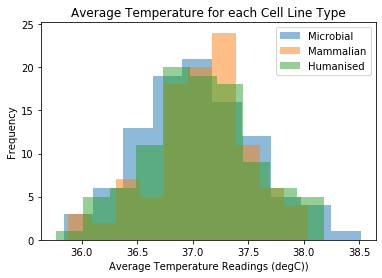

In [5]:
# Simulate Average Temperature Readings
mean_temp = 37.0
std_temp = 0.5
for dataset in datasets:
    # This will be a normally distributed range with a mean of 37.0 degC 
    temp = np.random.normal(mean_temp, std_temp, 100)
    dataset["avg_temp"] = temp.round(1)
    plt.hist(temp, alpha = 0.5)
plt.xlabel("Average Temperature Readings (degC))")
plt.ylabel("Frequency")
plt.title("Average Temperature for each Cell Line Type")
plt.legend(dsNames)

In [6]:
# Just a quick check on our dfs to see how they are coming along
dfMicro.sample(5)
#dfMam.head()
#dfHum.head()

,cell_line,br_size,avg_temp
59,Microbial,5600,36.1
79,Microbial,1900,37.5
99,Microbial,8400,37.2
51,Microbial,4200,36.4
13,Microbial,5500,37.6


### <a name="do"></a>2.4 Dissolved Oxygen  
Like the average temperature reading, the dissolved oxygen (DO) is continuously monitored throughout the process by the control system and the mean value simulated here. Again like the temperature, the microbial cells are easier to adapt to non-optimal DO levels [[5]](#5).  

To make things more interesting, we are going to make a huge leap here and say that if the DO is too high, it is a sign that air was too vigorously sparged through the bioreactor which would result in cell lysis (breaking apart - death). This is a true phenomenon, but increased O2 levels could also be due to factors other than sparging as well. 

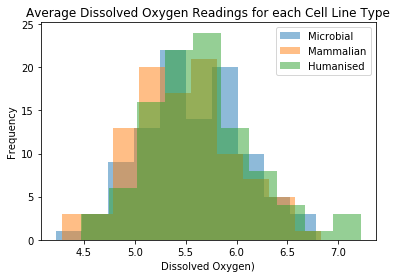

In [7]:
# Simulate Average Dissolved Oxygen Readings
mean_do = 5.5
std_do = 0.5

for dataset in datasets:
    # This will be a normally distributed range of DO averages centred around a mean of 5.0
    do = np.random.normal(mean_do, std_do, 100)
    # At 37degC the maximum possible DO concentration is 6.7
    # We need to ensure that no value exceeds that maximum 
    do = setLimits(do, False, 0, True, 6.7)
    dataset["avg_do"] = list(np.around(np.array(do),1)) 
    plt.hist(do, alpha = 0.5)

plt.xlabel("Dissolved Oxygen)")
plt.ylabel("Frequency")
plt.title("Average Dissolved Oxygen Readings for each Cell Line Type")
plt.legend(dsNames)

In [8]:
# Just a quick check on our dfs to see how they are coming along
#dfMicro.head()
dfMam.head()
#dfHum.head()

,cell_line,br_size,avg_temp,avg_do
0,CHO,5500,37.4,6.5
1,CHO,3000,36.5,4.3
2,CHO,5500,37.1,5.6
3,CHO,4000,37.2,5.6
4,CHO,8800,37.0,4.8


### <a name="culture"></a> 2.5 Culture Type  
The type of processing may be   
* Batch  
* Fed batch  
* Perfusion  

In the order given each type has longer processing times, has an increased yield and may have a small bioreactor volume in the case of perfusion method. For the purposes of data simulation, this is categorical data.  

The traits we will consider for allocation of culture type will be:
* Perfusion bioreactors tend to be smaller that other methods
* Fed-batch is the most common method
* Batch is the least common method 

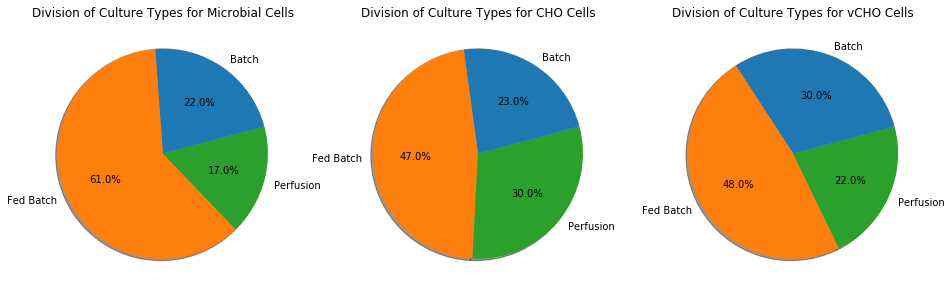

In [9]:
# Simulate different culture types
cultures=["Batch", "Fed Batch", "Perfusion"]
plt.rcParams['figure.figsize'] = [16, 6] # Needed to put this in again!
# Plot both the raw data and the "best fit" lines
i = 1
for dataset in datasets:
    culture=[]
    # iterate over rows with iterrows()
    for index, row in dataset.iterrows():
        # Change the probabilities of the culture type dependent on the bioreactor size
        if row["br_size"] < 2000:
            prob = [0.2, 0.2, 0.6]
        elif row["br_size"] < 6000:
            prob = [0.3, 0.5, 0.2]
        else:
            prob = [0.25, 0.7, 0.05]
        culture.append(np.random.choice(cultures, 1, replace=True, p =prob)[0])
    dataset["culture"] = culture
    
    # Data to plot
    sizes = (dataset[dataset.culture == "Batch"].culture.count(), \
            dataset[dataset.culture == "Fed Batch"].culture.count(), \
            dataset[dataset.culture == "Perfusion"].culture.count(), \
            )
    plt.subplot(1, 3, i)
    plt.pie(sizes, labels=cultures, autopct='%1.1f%%', startangle=15, shadow = True)
    plt.title("Division of Culture Types for " + dataset.cell_line[0] + " Cells")
    i+=1

In [10]:
# Just a quick check on our dfs to see how they are coming along
#dfMicro.head()
#dfMam.head()
dfHum.head()

,cell_line,br_size,avg_temp,avg_do,culture
0,vCHO,4800,37.1,5.4,Batch
1,vCHO,2500,37.3,6.0,Batch
2,vCHO,8600,36.6,5.4,Fed Batch
3,vCHO,8900,37.4,5.3,Fed Batch
4,vCHO,9500,36.9,5.9,Batch


### <a name="cell_dens"> </a> 2.6 Peak Viable Cell Density  
This is the maximum live cell density in x $10^6$ cells / ml. This is dependent on the type of cells and culture method used.  

Batch Systems < Fed-batch systems < Perfusion systems  

and  

Mammalian cells < Microbial cells

Within each of these categorisations the cell density could be assumed to be normally distributed.
4 < 6 < 15

In [11]:
# Simulate Cell Densities

for dataset in datasets:
    # Different standard deviations for microbial cultures - more repeatable
    if dataset.cell_line[0] == "Microbial":
        cd_std = 1
    else:
        cd_std = 2
    cd=[]
    # iterate over rows with iterrows()
    for index, row in dataset.iterrows():
        # Change the mean of the normalised distribution dependent on the culture type
        if row["culture"] == "Batch":
            cd_mean = 4
        elif row["culture"] == "Fed Batch":
            cd_mean = 6
        elif row["culture"] == "Perfusion":
            cd_mean = 15
        # taking the absolute (as there are no negative numbers) and integer value
        # Not using the setLimits function here as there is no absolute lower limit - just cannot be below zero
        cd.append(abs(int(np.random.normal(cd_mean, cd_std, 1)[0])))
    dataset["cell_density"] = cd
    
# Because microbial cell density is much greater
dfMicro.cell_density = dfMicro.cell_density * 4

**Note**: Using a normal distribution here it is possible some values will equate to cell density of 0. This is a valid measurement and can and does happen particularly if something went wrong in the seeding process.  

A cell density of zero reflects the fact that all cells are non-viable or dead. This may also happen if process conditions were incompatible with cellular processes eg environmental conditions like temperature, agitation speed etc, the addition of toxic substances, the build up of toxins from the cellular process itself or simply an exhaustion of nutrient supply.    

While the reading here is a Peak Cell Density, this is often not continually measured, but via sampling. A peak cell density in any of the above scenarios would be possible.

In [12]:
# Just a quick check on our dfs to see how they are coming along
#dfMicro.head()
dfMam.sample(5)
#dfHum.head()

,cell_line,br_size,avg_temp,avg_do,culture,cell_density
87,CHO,900,37.6,5.7,Perfusion,14
95,CHO,3500,37.0,5.3,Batch,3
56,CHO,1800,37.5,5.6,Perfusion,16
29,CHO,2100,36.4,5.2,Perfusion,14
42,CHO,1200,36.9,5.3,Perfusion,17


### <a name="hours"></a>2.7 Processing Days
Normal distribution dependent on: 
* cell type  
  - microbial cells requiring much less time due to quicker adaptation and cell growth
  - with mammalian cells requiring much longer to build up a sufficient cell density adapt to a new environment and to grow.
* size of bioreactor
  - the larger the bioreaactor the more seeding steps required to get an optimal cell density to seed the bioreactor. Too few cells in a large volume would equate to a longer total processing time at best and cell death at worst.  
  - we will assume that the actual processing time within the main bioreactor will be approximately equal (normal distribution) among the same cell type and culture method. The bioreactor size will affect only the pre-processing seed preparation steps.
  - 3days (72 hrs) + an additional 2 days (48hrs) for every 250L bioreactor size + 
* culture type  
  - batch being shorter,  
  - fed batch being longer  
  - perfusion being much longer


Proposed calculation factors:  

| Factor                                | Microbial | Mammalian | Humanised |
|---------------------------------------|-----------|-----------|-----------|
| **Batch / Fed Batch Modes**                                                   |
| Base Seed Days                        | 2         | 3         | 3         |
| Day Increase / 250L  Bioreactor size  | 1         | 2         | 2.3       |
| Days in Bioreactor                    | 3         | 5         | 6         |
| Fed-Batch Multiplier                  | 1.3       | 1.3       | 1.3       |
| **Perfusion**                                                                 |
| Total Time (Days)                     | 20        | 40        | 45        |
| Multiplier for every 250L increase    | 1.1       | 1.2       | 1.2       |

Text(0.5, 1.0, 'Histogram of Processing Time per Cell Line')

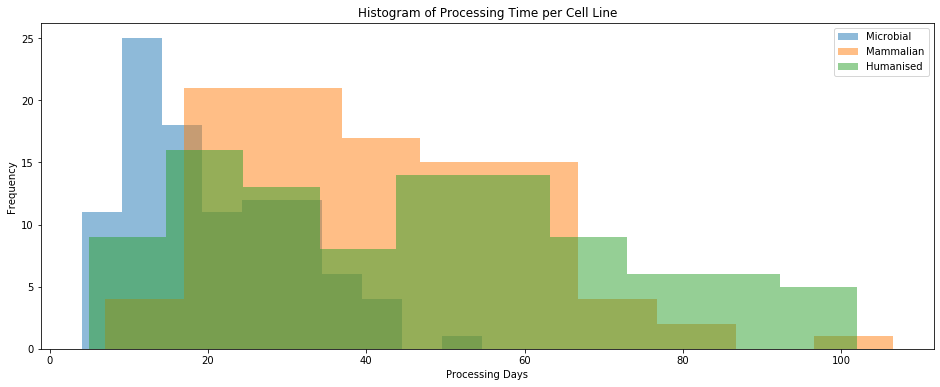

In [13]:
# Simulate Processing Hours

for dataset in datasets:
    days = []
    fb_mult = 1.3
    
    # Set the parameters as per the table above
    if dataset.cell_line[0] == "Microbial":
        seed_base = 2
        seed_inc = 1
        bio = 3
        perf = 20
        perf_mul = 1.1
    elif dataset.cell_line[0] == "CHO":
        seed_base = 3
        seed_inc = 2
        bio = 5
        perf = 40
        perf_mul = 1.2
    else:
        seed_base = 3
        seed_inc = 2.3
        bio = 6
        perf = 45
        perf_mul = 1.2

    # iterate over rows with iterrows()
    for index, row in dataset.iterrows():
        
        # Change the mean of the normalised distribution dependent on the culture type
        if row["culture"] == "Perfusion":
            mean = perf + (row.br_size*perf_mul/500)
        else:
            mean = seed_base + (row.br_size*seed_inc/500) + bio
            
        # Simulate the values to come from the normalised distribution
        # based on the calculated mean with a standard distribution of the mean / 3
        time = int(np.random.normal(mean, (mean/3),1))
        
        # Add a multiplier for the fed-batch processing
        if row.culture == "Fed Batch": time = time * fb_mult
        
        # Append it to the days list
        days.append(time)
        
    # As we are using a normal distribution - make sure none of our values are below zero. Set a base of 3 days
    days = setLimits(days, True, False, 3, 0) 
    
    # Add a new column "time" to the dataframe
    dataset["time"] = days
    
    # Plot a histgram of it
    plt.hist(days, alpha = 0.5)

# Add the legend and labels
plt.legend(dsNames)
plt.xlabel("Processing Days")
plt.ylabel("Frequency")
plt.title("Histogram of Processing Time per Cell Line")

In [14]:
# Just a quick check on our dfs to see how they are coming along
dfMicro.sample(5)
#dfMam.head()
#dfHum.head()

,cell_line,br_size,avg_temp,avg_do,culture,cell_density,time
87,Microbial,5000,37.3,5.8,Fed Batch,28,29.9
65,Microbial,4400,37.6,4.9,Perfusion,56,16.0
52,Microbial,1800,36.5,5.5,Fed Batch,20,9.1
46,Microbial,600,37.1,5.1,Perfusion,56,22.0
47,Microbial,5600,36.7,6.6,Fed Batch,24,14.3


In [15]:
# Sanity Check
print("Min. Microbial Time =", dfMicro.time.min())
print("Min. Mammalian Time =", dfMam.time.min())
print("Min. Humanised Time =", dfHum.time.min())

Min. Microbial Time = 4.0
Min. Mammalian Time = 7.0
Min. Humanised Time = 5.0


### <a name="alarms"></a> 2.8  No of Alarms  
The production process is monitored and controlled by an automated control system. This control system will alarm if various parameters fall outside of the acceptable limits. It is a reasonable assumption that the greater the number of alarms during processing would have an adverse effect on the yield. From a data simulation perspective, this would be a Poisson distribution of events during the cell growth, over the growth period. But some of the already simulated data will have an effect on the simulated data.    
 
Our simulation model will use:  
* The Poisson distribution for alarms with a lambda value of 1.2 alarms per day  
* The number of processing days
* The already simulated processing conditions:  
 - Average temperature 
 - Average DO

We already have simulated some of the data being recorded over the production time, namely temperature and dissolved oxygen. As what we have simulated is the mean temperature and DO, we can assume that those having values further away from the mean will probably have had more alarms generated during processing so therefore we may take this into consideration. To know how far a value is away from the mean we will use the process variables' Z-scores. The Z-score is a measure of the number of standard deviations any given reading is away form the mean. To stop the effects of one "good" z-score value nnegating the efects of one "bad" reading, we will take the maximum of the absolute value of the two z-scores and use that as a multiplier.  

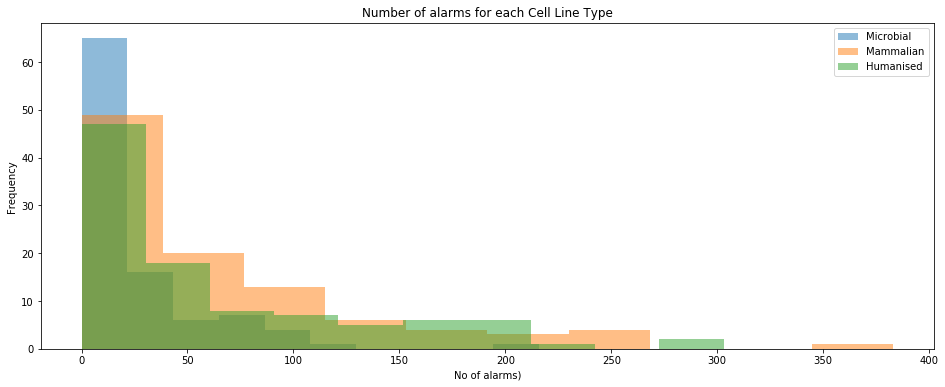

In [16]:
# Simulating the alarms
lam = 1.2 # the frequency of alarms

for dataset in datasets:
    # Alarm calculation - poisson distribution * processing time * max of absolute value of zscores of temperature and do readings
    alarms = (np.random.poisson(lam, 100) * dataset.time * list(map(max, zip(abs(stats.zscore(dataset.avg_temp)),abs(stats.zscore(dataset.avg_do)))))).round(0)
    # Convert the alarm values to integers (because you cannot have a bit of an alarm)
    # and add to the dataset [12]
    dataset["alarm"] = list(map(int, alarms))  
    plt.hist(alarms, alpha = 0.5)

plt.xlabel("No of alarms)")
plt.ylabel("Frequency")
plt.title("Number of alarms for each Cell Line Type")
plt.legend(dsNames)

In [17]:
# Just a quick check on our dfs to see how they are coming along
dfMicro.sample(5)
#dfMam.head()
#dfHum.head()

,cell_line,br_size,avg_temp,avg_do,culture,cell_density,time,alarm
46,Microbial,600,37.1,5.1,Perfusion,56,22.0,20
95,Microbial,8600,36.7,5.8,Fed Batch,24,28.6,19
25,Microbial,6100,36.3,4.6,Fed Batch,20,31.2,0
81,Microbial,3000,37.1,5.7,Fed Batch,16,14.3,12
6,Microbial,1400,37.1,5.8,Batch,12,11.0,5


In [18]:
# Sanity Check
i = 0
for dataset in datasets:
    print("="*40)
    # See how many are have no alarms
    print("The number of " + dsNames[i] + " cultures without an alarm is:",dataset.alarm[dataset.alarm == 0].count())
    print("")
    i+=1
    # And the top 5 no of alarms of each
    print(dataset.sort_values(by=['alarm'], ascending=False).head())
    print("")

The number of Microbial cultures without an alarm is: 33

    cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  alarm
27  Microbial     8500      36.1     5.4  Fed Batch            24  29.9    216
28  Microbial     9000      37.9     5.0  Fed Batch            24  26.0    128
33  Microbial     6700      37.7     5.1      Batch            16  20.0    101
3   Microbial     9400      37.6     6.8  Fed Batch            28  40.3     99
74  Microbial    10000      36.4     4.8  Fed Batch            24  29.9     90

The number of Mammalian cultures without an alarm is: 22

   cell_line  br_size  avg_temp  avg_do    culture  cell_density  time  alarm
64       CHO    10000      37.2     4.4  Fed Batch             6  59.8    383
44       CHO     5500      37.5     4.9  Fed Batch             7  55.9    255
15       CHO     1100      36.8     5.1  Perfusion            13  57.0    254
37       CHO     9400      37.2     6.3      Batch             9  37.0    244
68       CHO     37

Text(0.5, 1.0, 'Processing Time vs No of Alarms')

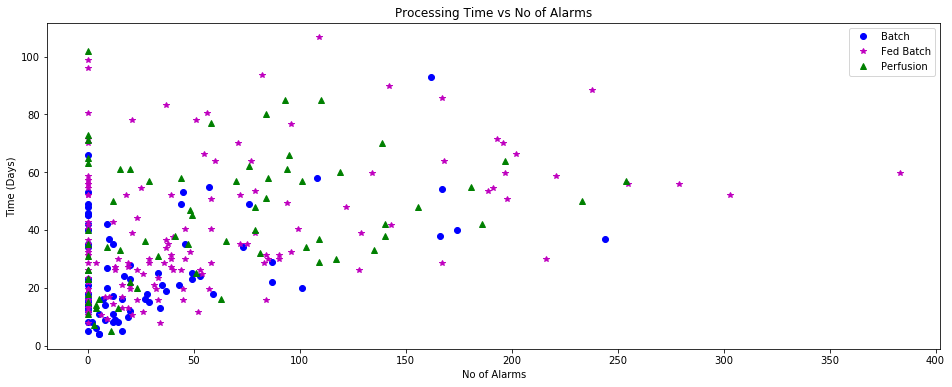

In [19]:
# Plotting the total alarms against the processing time for Batch
plt.plot(dfMicro.alarm[dfMicro.culture == "Batch"],dfMicro.time[dfMicro.culture == "Batch"], "bo", label="Batch")
plt.plot(dfMam.alarm[dfMam.culture == "Batch"],dfMam.time[dfMam.culture == "Batch"], "bo")
plt.plot(dfHum.alarm[dfHum.culture == "Batch"],dfHum.time[dfHum.culture == "Batch"], "bo")

# Plotting the total alarms against the processing time for Fed Batch
plt.plot(dfMicro.alarm[dfMicro.culture == "Fed Batch"],dfMicro.time[dfMicro.culture == "Fed Batch"], "m*", label="Fed Batch")
plt.plot(dfMam.alarm[dfMam.culture == "Fed Batch"],dfMam.time[dfMam.culture == "Fed Batch"], "m*")
plt.plot(dfHum.alarm[dfHum.culture == "Fed Batch"],dfHum.time[dfHum.culture == "Fed Batch"], "m*")

# Plotting the total alarms against the processing time for Perfusion
plt.plot(dfMicro.alarm[dfMicro.culture == "Perfusion"],dfMicro.time[dfMicro.culture == "Perfusion"], "g^", label="Perfusion")
plt.plot(dfMam.alarm[dfMam.culture == "Perfusion"],dfMam.time[dfMam.culture == "Perfusion"], "g^")
plt.plot(dfHum.alarm[dfHum.culture == "Perfusion"],dfHum.time[dfHum.culture == "Perfusion"], "g^")

# Adding the info to the plot
plt.legend()
plt.xlabel("No of Alarms")
plt.ylabel("Time (Days)")
plt.title("Processing Time vs No of Alarms")

### <a name="yield"></a> 2.9 Yield  
The reason the cells are grown in the bioreactor is to product the protein of choice e.g. an antibody, generally for therapeutic use. The yield is the amount of product produced [[15]](#15) and all variables simulated have either a direct or an indirect impact on the yield as follows:  

* **Cell line** - Cell line has an impact on almost every parameter shown. For the purposes of simulation, each cell line will have its own parameters.  
    - Microbial cells generally have a high yield and are more robust in processing.
    - CHO cells have a much reduced yield and are less robust. Having said that, they are capable of producing much more complex proteins.  
    - Humanised cells would be similar to the mammalian cells.
* **Bioreactor Size**  - The size of the bioreactor has a great impact on the yield produced because in general, more volume means more cells which means more product. The bioreactor size however reflects the volume of the bioreactor itself. The entire vessel is never full and as a result we will factorise this by making an assumption that it is 60% full. 
* **Average Temperature / Dissolved Oxygen / No of Alarms** - The average temperature and dissolved oxygen readings have an indirect effect on yield in that their cumulative effect is represented in the number of alarms generated. It is reasonable to expect that in a well controlled process there would be fewer alarms which would in turn mean that the processing occurred nearer the optimal conditions and therefore have greater product yields.  
* **Peak Viable Cell Density** - generally more cells mean more product.
* **Processing Hours**  
    - For Batch / Fed-Batch his relates more to the number of alarms generated, which affects yield.  
    - For perfusion cultures this is directly related to yield
* **Culture type** - depending on the culture type, how the other factors affect them  
    - Batch / Fed-Batch - along with the cell density, the bioreactor size is the most important aspect to simulating the yield. The processing time is not as important.  
    - Perfusion - next to cell density, the processing time is the most important attribute as the cells are constantly producing product for most of that time and the times are extended. The bioreactor size is still important however.  

Yield calculation of Batch and Fed Batch cultures:  
* We assume at the mean cell density we would have a normal distribution with a mean of 8 g/l for Mammalian cells, 7 g/l for Humanised and 10 g/l for microbial cells.   
* Multiply the base by the actual cell density / mean expected cell density
* Determine the number of alarms / day, if greater than 1.2 (our expected interval from the Poisson Distribution) divide the yield by the alarms per day value.  

Yield calculation for Perfusion cultures:  
* Add an additional multiplier for perfusion based on the time in bioreactor. As the cell density of a perfusion culture system is much greater than a batch / fed-batch system, the multiplier for time spent in the bioreactor will be and additional 0.1 per day.  

The final yield added to the dataset will be in kg so will need to be divided by 1000. We will subsequently round the yield off to two decimal places.

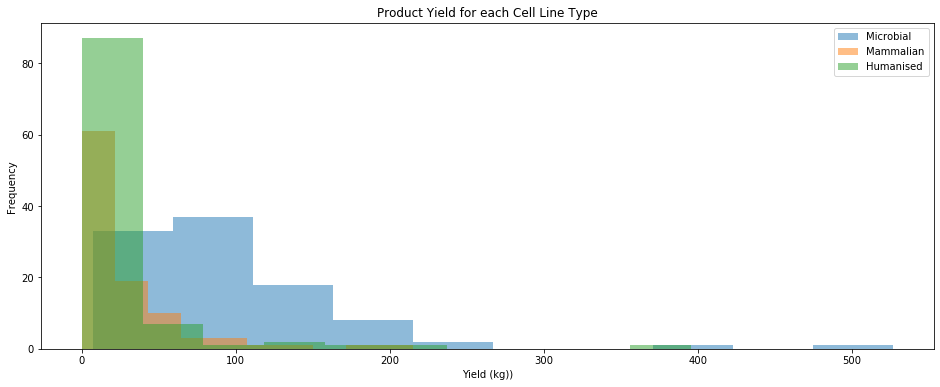

In [20]:
for dataset in datasets:
    # Create an empty list for the values
    brYield = []
    
    # This is our base cell density for each cell line
    if dataset.cell_line[0] == "Microbial":
        cl_multi = 10
    elif dataset.cell_line[0] == "CHO":
        cl_multi = 8
    elif dataset.cell_line[0] == "vCHO":
        cl_multi = 7
    
    # Create a normal distribution around the base
    brYield = np.random.normal(cl_multi, 1, size= 100)

    # As we are using a normal distribution - make sure none of our values are below zero. Zero is acceptable.
    # Also converting to numpy array as needed for rounding below
    brYield = np.asarray(setLimits(brYield, True, False, 0.0, 0.0), dtype=np.float32)

    # Iterate over rows with iterrows()
    for index, row in dataset.iterrows():
        # Set the alarm factor - based on alarms per day
        alm_day = row.alarm / row.time
        # If there were less than 1.2 alarms per day - there should be no effect
        if alm_day < 1.2: alm_day = 1
            
        # Set the multipliers for each culture type
        if row.culture == "Batch":
            # The actual cell density divided by the mean cell density
            # The mean here is the one used to create the Normal Distribution of the cell density
            cm_multi = row.cell_density / 4
        elif row.culture == "Fed Batch":
            # As per the batch with the Fed Batch cell density included
            cm_multi = row.cell_density / 6
        elif row.culture == "Perfusion":
            # An additional multiplier here to reflect the length of time in the bioreactor
            cm_multi = 0.1 * row.time * row.cell_density / 15
            
        # Change the brYield list to reflect the multipliers
        brYield[index] = brYield[index] * row.br_size * 0.6 * cm_multi/ alm_day
    
    # Convert the g to kg and round the values to 2 decimal places
    brYield = list(np.around(np.array(brYield/1000),2))
    
    # Add the simulated Bioreactor yield data to the dataframe
    dataset["br_yield"] =  brYield
    
    # Plot 
    plt.hist(brYield, bins = 10, alpha = 0.5)

# Label the plot accordingly
plt.xlabel("Yield (kg))")
plt.ylabel("Frequency")
plt.title("Product Yield for each Cell Line Type")
plt.legend(dsNames)

In [21]:
i = 0
# Sanity Check
for dataset in datasets:
    print("="*40)
    # For each dataset
    print("The top 5 " + dsNames[i] + " yield values are:")
    print("")
    # Show the top 5 yields of each [18]
    print(dataset[["br_size", "culture", "cell_density", "time", "alarm", "br_yield"]].nlargest(5,"br_yield"))
    print("")
    print("The bottom 5 " + dsNames[i] + " yield values are:")
    print("")
    # And the bottom 5 yields of each
    print(dataset[["br_size", "culture", "cell_density", "time", "alarm", "br_yield"]].nsmallest(5,"br_yield"))
    print("")
    i+=1

The top 5 Microbial yield values are:

    br_size    culture  cell_density  time  alarm    br_yield
97     5700  Perfusion            60  38.0     41  526.599976
89     9900  Perfusion            56  40.0     79  420.250000
99     8400  Fed Batch            24  11.7      0  236.339996
35     9400  Fed Batch            28  36.4     37  234.289993
95     8600  Fed Batch            24  28.6     19  205.399994

The bottom 5 Microbial yield values are:

    br_size    culture  cell_density  time  alarm   br_yield
1      1500  Fed Batch            20  11.7     52   7.140000
79     1900  Perfusion            56   5.0     11   7.530000
60     2400      Batch            16   5.0     16  16.290001
63     3900  Fed Batch            16   7.8     34  16.740000
86      700  Fed Batch            24  10.4      0  16.760000

The top 5 Mammalian yield values are:

    br_size    culture  cell_density  time  alarm    br_yield
35     7100  Perfusion            15  58.0     44  214.740005
39     4500  Per

Text(0.5, 1.0, 'Bioreactor Size vs Yield for Each Culture Type')

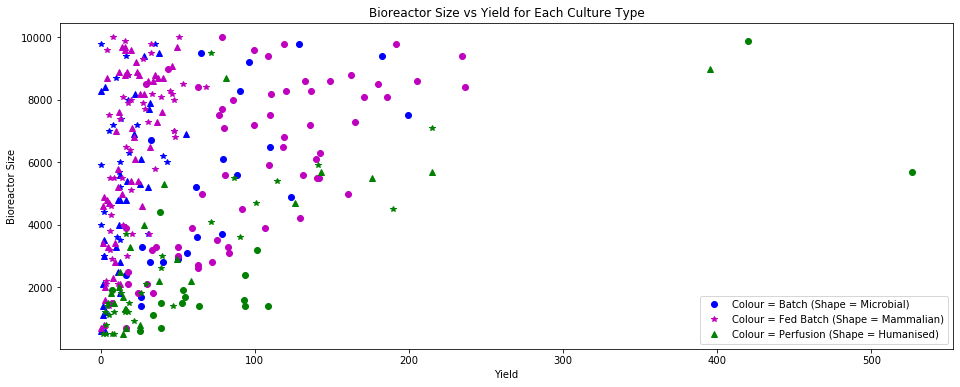

In [22]:
# Plotting the total yield against the processing time for Batch
plt.plot(dfMicro.br_yield[dfMicro.culture == "Batch"],dfMicro.br_size[dfMicro.culture == "Batch"], "bo", label="Colour = Batch (Shape = Microbial)")
plt.plot(dfMam.br_yield[dfMam.culture == "Batch"],dfMam.br_size[dfMam.culture == "Batch"], "b*")
plt.plot(dfHum.br_yield[dfHum.culture == "Batch"],dfHum.br_size[dfHum.culture == "Batch"], "b^")

# Plotting the total alarms against the processing time for Fed Batch
plt.plot(dfMicro.br_yield[dfMicro.culture == "Fed Batch"],dfMicro.br_size[dfMicro.culture == "Fed Batch"], "mo")
plt.plot(dfMam.br_yield[dfMam.culture == "Fed Batch"],dfMam.br_size[dfMam.culture == "Fed Batch"], "m*", label="Colour = Fed Batch (Shape = Mammalian)")
plt.plot(dfHum.br_yield[dfHum.culture == "Fed Batch"],dfHum.br_size[dfHum.culture == "Fed Batch"], "m^")

# Plotting the total alarms against the processing time for Perfusion
plt.plot(dfMicro.br_yield[dfMicro.culture == "Perfusion"],dfMicro.br_size[dfMicro.culture == "Perfusion"], "go")
plt.plot(dfMam.br_yield[dfMam.culture == "Perfusion"],dfMam.br_size[dfMam.culture == "Perfusion"], "g*")
plt.plot(dfHum.br_yield[dfHum.culture == "Perfusion"],dfHum.br_size[dfHum.culture == "Perfusion"], "g^", label="Colour = Perfusion (Shape = Humanised)")

# Adding the info to the plot
plt.legend()
plt.xlabel("Yield")
plt.ylabel("Bioreactor Size")
plt.title("Bioreactor Size vs Yield for Each Culture Type")

### <a name="worth"></a>2.10 Net Worth of Batch  
Biopharmaceuticals are an expensive commodity [[16](#16)] used to treat many different diseases. According to the Australian Government [[19](#19)] the Dec 2019 average cost per gram of (a subset of 32) biopharmaceuticals was just over AU\\$60K.  

This broke down to:  
* Microbial: min AU\\$6.14; max AU\\$3207; mean AU\\$911
* Mammalian: min AU\\$1833; max AU\\$607479; mean AU\\$44913
* Humanised: min AU\\$1019; max AU\\$949500; mean: AU\\$127602

The reason for the big spread of microbial prices is due to the nature of products produced from the lower value anitbiotics to the higher end mAb fragments.  

The humanised average is skewed heavily to the right due to a single outlier, Lemtrada, used to treat CLL and MS which worked out at close to one million dollars per gram.  

Similarly, the mammalian average is skewed to the right due to Lucentis, priced at over AU\\$600,000 per gram.

For the purposes of this simulation, we will exclude the two outliers from the mammaial and humanised price lists and base all other pricing on a uniform distribution per cell line as follows:  
* Microbial: 
    - Min AU\\$6.14  
    - Max AU\\$3207
* Mammalian:  
    - Min AU\\$1833
    - Max AU\\$37046
* Humanised:
    - Min AU\\$1019
    - Max AU\\$110367  



## <a name="finish"></a>3. Finishing Off the Dataset

In [23]:
# Code to mix up the dataframe
#df = df.sample(frac=1).reset_index(drop=True)

## <a name="describe"></a>4. Describe New Dataset  


## <a name="conclusion"></a>5. Conclusion

###### <a name="refs"></a>6. References ##
1. [NumPy Site](http://www.numpy.org/)  <a name = "1"></a>  
2. [Project Jupyter](http://jupyter.org/) <a name = "2"></a>  
3. [I. Watanabe , S. Okada Effects of Temperature on Growth Rate of Cultured Mammalian Cells (L5178Y), J Cell Biol (1967) 32 (2): 309-323](http://jcb.rupress.org/content/jcb/32/2/309.full.pdf)<a name = "3"></a>  
4. [Felipe Tapia, Daniel Vázquez-Ramírez, Yvonne Genzel, Udo Reichl  Bioreactors for high cell density and continuous multi-stage cultivations: options for process intensification in cell culture-based viral vaccine production, Appl Microbiol Biotechnol. 2016; 100: 2121–2132. Published online 2016 Jan 13. doi: 10.1007/s00253-015-7267-9](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4756030/) <a name = "4"></a>  
5. [GE Life Sciences: 7 Factors that Affect Oxygen Transfer](https://www.gelifesciences.com/en/us/solutions/bioprocessing/knowledge-center/7-factors-that-affect-oxygen-transfer-to-cells-in-bioreactors) <a name = "5"></a>  
6. [Python and R Tips: How To Loop Through Pandas Rows? or How To Iterate Over Pandas Rows?](https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/) <a name = "6"></a>  
7. [Brooks Instrument - Boosting Bioreactor Performance by Enhancing MFC accuracy](https://www.brooksinstrument.com/en/blog/boosting-bioreactor-performance-by-enhancing-mfc-accuracy)<a name = "7"></a>  
8. [Wikipedia - Chinese Hamster Ovary Cell](https://en.wikipedia.org/wiki/Chinese_hamster_ovary_cell)<a name = "8"></a>   
9. [Stack Overflow: How to Make Two Plots Side by Side](https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python)<a name = "9"></a>  
10. [Stack Overflow: Shuffle Dataframe Rows](https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows) <a name = "10"></a>  
11. [Scipy Docs: Z-Scores](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.zscore.html)<a name = "11"></a>  
12. [Geeks for Geeks: Python Converting all Strings in List to Integers](https://www.geeksforgeeks.org/python-converting-all-strings-in-list-to-integers/)<a name = "12"></a>  
13. Trevor J. Marshall, Yvonne A. Brady, Chapter 30 - Process Control and Automation Solutions, Editor(s): Günter Jagschies, Eva Lindskog, Karol Łącki, Parrish Galliher, Biopharmaceutical Processing, Elsevier, 2018, Pages 579-621 <a name = "13"> </a>  
14. [Spadiut O, Capone S, Krainer F, Glieder A, Herwig C. Microbials for the production of monoclonal antibodies and antibody fragments. Trends Biotechnol. 2014;32(1):54–60. doi:10.1016/j.tibtech.2013.10.002](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3906537/) <a name = "14"> </a>  
15. [Kelley B. Industrialization of mAb production technology: the bioprocessing industry at a crossroads. MAbs. 2009;1(5):443–452. doi:10.4161/mabs.1.5.9448](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2759494/) <a name = "15"></a>  
16. [Inmaculada Hernandez, PharmD, PhD; Samuel W. Bott, BS; Anish S. Patel, BS; Collin G. Wolf, BS; Alexa R. Hospodar, BS;
Shivani Sampathkumar, BS; and William H. Shrank, MD, Pricing of Monoclonal Antibody Therapies: Higher If Used for Cancer? MSHSAm J Manag Care. 2018;24(2):109-112](https://ajmc.s3.amazonaws.com/_media/_pdf/AJMC_02_2018_Hernandez%20final.pdf) <a name ="16"></a>  
17. [Ou J, Si Y, Goh K, Yasui N, Guo Y, Song J, et al. (2018) Bioprocess development of antibody-drug conjugate production for cancer treatment. PLoS ONE 13(10): e0206246](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0206246) <a name ="17"></a>  
18. [Dario Radečić, Towards Data Science: Top 3 Pandas Functions You Don't Know About Probably](https://towardsdatascience.com/top-3-pandas-functions-you-dont-know-about-probably-5ae9e1c964c8) <a name ="18"></a>  
19. [Pbs.gov.au. (2019). Pharmaceutical Benefits Scheme (PBS) | Ex-manufacturer price. [online] Available at: http://www.pbs.gov.au/info/industry/pricing/ex-manufacturer-price [Accessed 9 Dec. 2019].](http://www.pbs.gov.au/industry/pricing/ex-manufacturer-price/2019/ex-manufactrer-prices-non-efc-2019-12-02.XLSX) <a name ="19"></a>  
20. []() <a name ="20"></a>  